In [1]:
data_path = ''

In [2]:
file = f'{data_path}viewing_times.xlsx'

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel(file, sheet_name='raw data', names=['time','views'])

In [5]:
df.head(1)

,time,views
0,0.0,1.666771


In [6]:
#Change fraction of hour to datetime
import datetime
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import MonthEnd
def date_for_frac(frac):
    fill_date = '1/1/2019'
    #Hours
    remainder = frac % 1
    hours = frac - remainder 
    #Minutes
    frac = remainder * 60 
    remainder = frac % 1
    minutes = frac - remainder 
    #Seconds
    frac = remainder * 60 
    remainder = frac % 1
    seconds = frac - remainder
    
    time = str(int(hours))+":"+str(int(minutes))+":"+str(int(seconds))
    
    dt = datetime.datetime.strptime(fill_date+' '+time,'%d/%m/%Y %H:%M:%S')
    return dt

In [7]:
date_for_frac(1.125)

datetime.datetime(2019, 1, 1, 1, 7, 30)

In [8]:
df['datetime'] = df['time'].apply(date_for_frac)

Text(0.5, 0, 'Time')

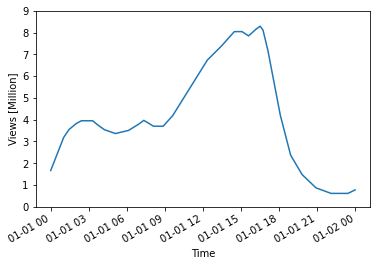

In [9]:
ax = df.plot(x="datetime", y="views", legend=False)
ax.set_ylim(0,9)
ax.set_ylabel("Views [Million]")
ax.set_xlabel("Time")

In [10]:
df['views'].describe()

count    35.000000
mean      4.056746
std       2.512828
min       0.614151
25%       2.366345
50%       3.758425
75%       5.475730
max       8.296957
Name: views, dtype: float64

In [11]:
fig = ax.get_figure()
fig.savefig('daily_views.pdf')

In [12]:
df_views = df.set_index('datetime')
df_views.drop(columns='time')

,views
datetime,
2019-01-01 00:00:00,1.666771
2019-01-01 00:27:52,2.359668
2019-01-01 01:01:06,3.183851
2019-01-01 01:26:37,3.550330
2019-01-01 01:59:43,3.818464
2019-01-01 02:24:45,3.952199
2019-01-01 02:59:46,3.952199
2019-01-01 03:18:27,3.952199
2019-01-01 03:42:35,3.758425


In [13]:
df_views = df_views[~df_views.index.duplicated(keep='first')]['views']

In [14]:
#resamples to each hour
df_views = pd.DataFrame(df_views.resample('60min').mean().interpolate())

In [15]:
index = ["t_00","t_01","t_02","t_03","t_04","t_05","t_06","t_07","t_08","t_09","t_10","t_11","t_12","t_13","t_14","t_15","t_16","t_17","t_18","t_19","t_20","t_21","t_22","t_23"]
df_views.insert(0,"group",index, True)

Text(0.5, 0, 'Time')

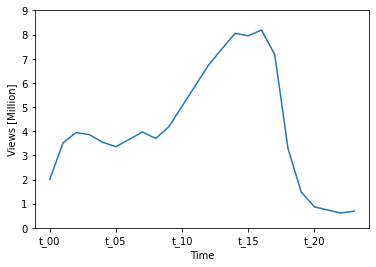

In [16]:
ax = df_views.plot(x="group", y="views", legend=False)
ax.set_ylim(0,9)
ax.set_ylabel("Views [Million]")
ax.set_xlabel("Time")

In [17]:
df_views = df_views.set_index("group")

In [18]:
df_views

,views
group,
t_00,2.013220
t_01,3.517548
t_02,3.952199
t_03,3.855312
t_04,3.541404
t_05,3.364205
t_06,3.660996
t_07,3.970079
t_08,3.701168


In [19]:
df_views.to_csv('formatted_views.csv')